In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/denisvivdenko/titanic_practice_dataset.git

Cloning into 'titanic_practice_dataset'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 8 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [25]:
!cd titanic_practice_dataset

/bin/bash: line 0: cd: titanic_practice_dataset: No such file or directory


In [21]:
!git pull origin master

fatal: not a git repository (or any of the parent directories): .git


In [26]:
pwd

'/content/titanic_practice_dataset'

In [27]:
df = pd.read_csv("train.csv")

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.shape

(891, 12)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
X, y = df.drop("Survived", axis=1), df.Survived

In [33]:
X.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [34]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Ticket feature

In [35]:
X.Ticket.nunique()

681

Why if the Ticket feature is ticket number even though we don't have missing values they are only 681 unique out of 891

In [36]:
X.Ticket.value_counts().head(20)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
W./C. 6608      4
2666            4
19950           4
347077          4
C.A. 31921      3
Name: Ticket, dtype: int64

In [37]:
X["ticket_code"] = X.Ticket.map(lambda x: " ".join([ticket_info for ticket_info in x.split(" ") if not ticket_info.isnumeric()]))

In [38]:
X.loc[X.ticket_code == "", "ticket_code"] = "None"

In [39]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None


In [40]:
X = X.drop("Ticket", axis=1)

In [41]:
X.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,A/5
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,PC


In [43]:
X.set_index("PassengerId", inplace=True)

# Drop name feature

In [45]:
X.drop("Name", axis=1, inplace=True)

In [46]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.25,NaN,S,A/5


# Age feature

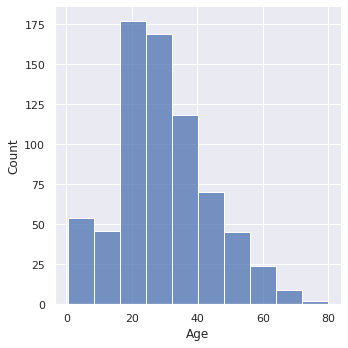

In [48]:
sns.displot(x=X.Age, bins=10);

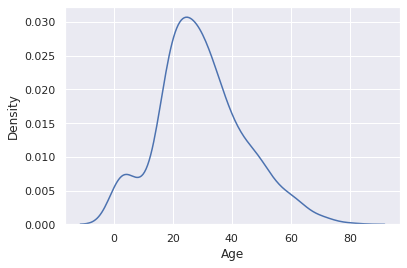

In [49]:
sns.kdeplot(x=X.Age);

Distribution has two peacks and long right tail therefore we cannot assume that it is normally distributed

In [51]:
X.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

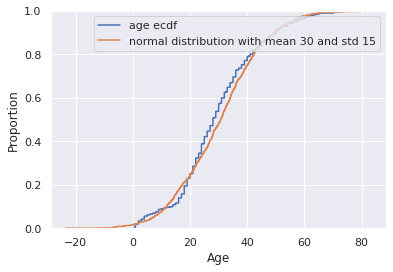

In [55]:
sns.ecdfplot(X.Age);
sns.ecdfplot(np.random.normal(30, 15, size=10**3));
plt.legend(labels=["age ecdf","normal distribution with mean 30 and std 15"]);

We can see that it is nearly normally distributed. We have to get rid of outliers. And if we need it normally distributed we should apply log transform.

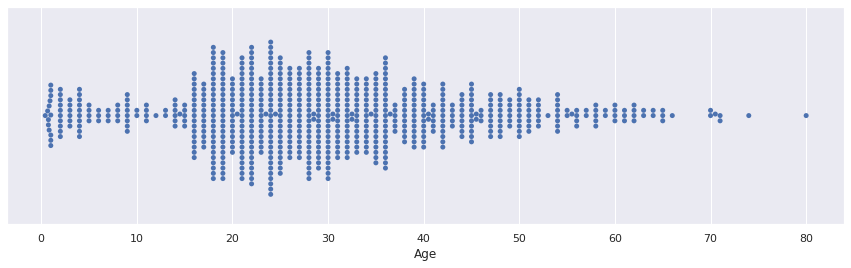

In [63]:
plt.figure(figsize=(15, 4));
sns.swarmplot(x=X.Age);

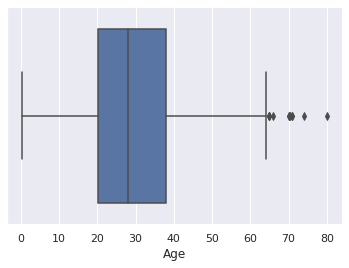

In [65]:
sns.boxplot(x=X.Age);

Outliers on the right side. We can detect the using IQR * 1.5

In [67]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ticket_code
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S,A/5
2,1,female,38.0,1,0,71.2833,C85,C,PC


# Fare feature

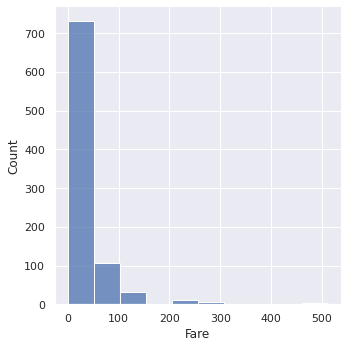

In [70]:
sns.displot(x=X.Fare, bins=10);

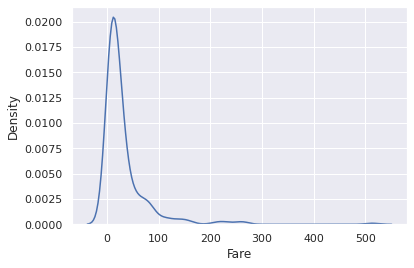

In [72]:
sns.kdeplot(x=X.Fare);

In [76]:
X.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

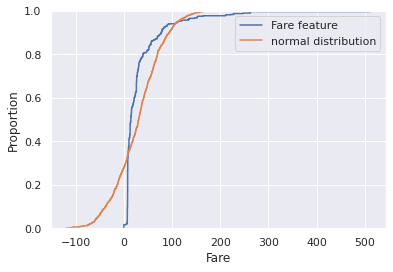

In [80]:
sns.ecdfplot(X.Fare);
sns.ecdfplot(np.random.normal(32, 50, size=10**3));
plt.legend(labels=["Fare feature", "normal distribution"]);

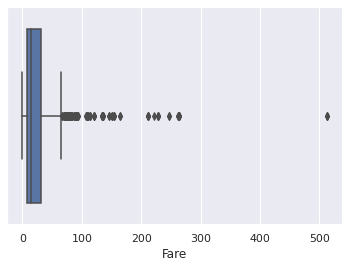

In [81]:
sns.boxplot(x=X.Fare);